# Simple Linear Regression 

Notebook covering linear regression theory and practice (simple LR, loss fn, GD, LR training).

---

## Table of contents
1. Setup & Data
2. Quick EDA
3. Simple Linear Regression (single feature)
4. MSE & Gradient Descent

---


## 1) Setup & Data
Load libraries and the California Housing dataset (sklearn). We'll place data into a pandas DataFrame for exploration.

In [1]:
# Setup imports and load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# plotting defaults
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

# Load dataset
cal = fetch_california_housing(as_frame=True)
df = cal.frame.copy()
df.rename(columns={cal.target_names[0]: 'MedHouseVal'}, inplace=True)
print('Data shape:', df.shape)
df.head()

Data shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2) Quick EDA & Visualization
Inspect distributions and correlations. Visualize MedInc vs MedHouseVal.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


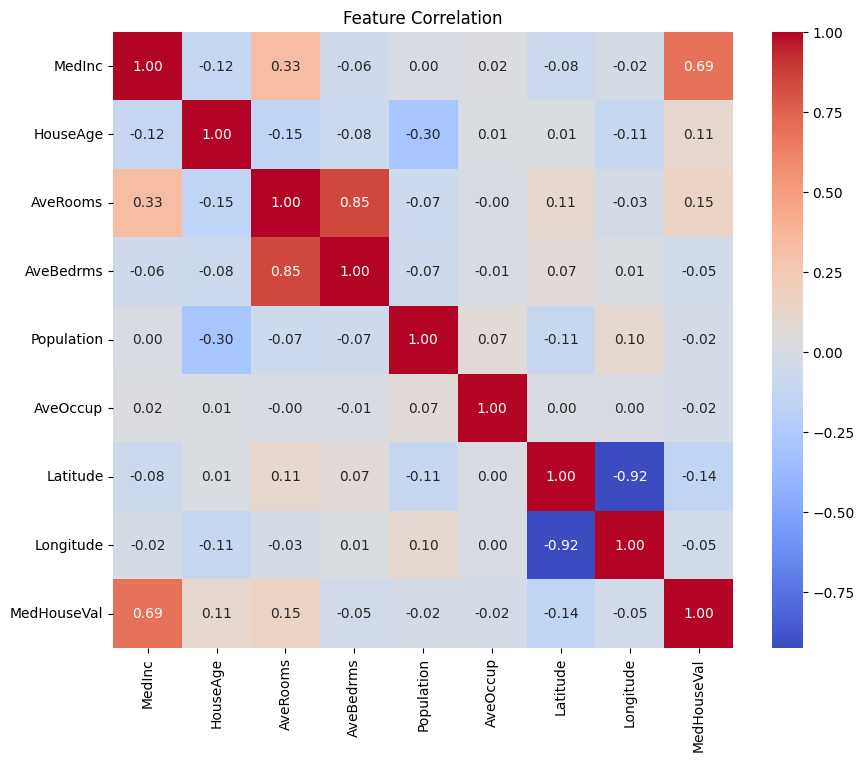

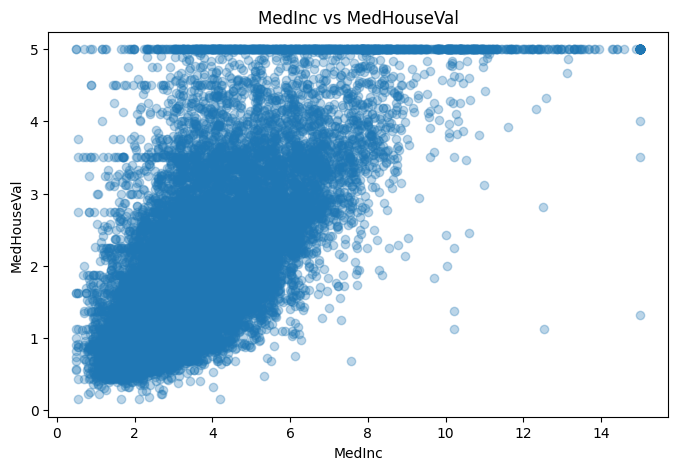

In [2]:
# Basic EDA
display(df.describe())

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Scatter: MedInc vs MedHouseVal
plt.figure(figsize=(8,5))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.3)
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('MedInc vs MedHouseVal')
plt.show()

## 3) Simple Linear Regression (single feature)
Fit a straight line predicting MedHouseVal from MedInc. We'll show analytic closed-form and sklearn's LinearRegression.

sklearn intercept, slope: 0.4445972916907879 0.4193384939381271


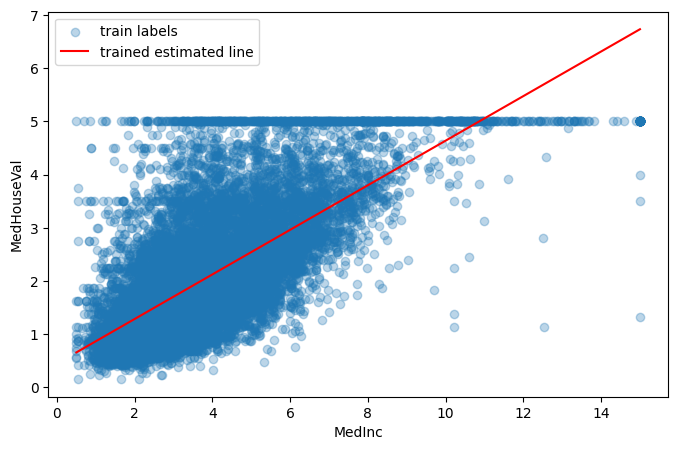

Testing a sample: 
 Predicted: [3.84677436] 
 True: 4.466


In [3]:
# Single feature: MedInc -> MedHouseVal
X = df[['MedInc']].values
y = df['MedHouseVal'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
print('sklearn intercept, slope:', lr.intercept_, lr.coef_[0])

intercept = lr.intercept_
slope = lr.coef_[0]

# Plot
plt.scatter(X_train, y_train, alpha=0.3, label='train labels')
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
plt.plot(x_line, intercept + slope * x_line, color='red', label='trained estimated line')
plt.xlabel('MedInc'); plt.ylabel('MedHouseVal'); plt.legend(); 
plt.show()

print(f'Testing a sample: \n Predicted: {lr.predict(X_test[9].reshape(1,-1))} \n True: {y_test[9]}' )

## 4) Loss (MSE) & Gradient Descent
Implement MSE and a simple gradient descent optimizer for the single feature model. Observe convergence.

Gradient descent theta: [0.1275193  0.48582452]


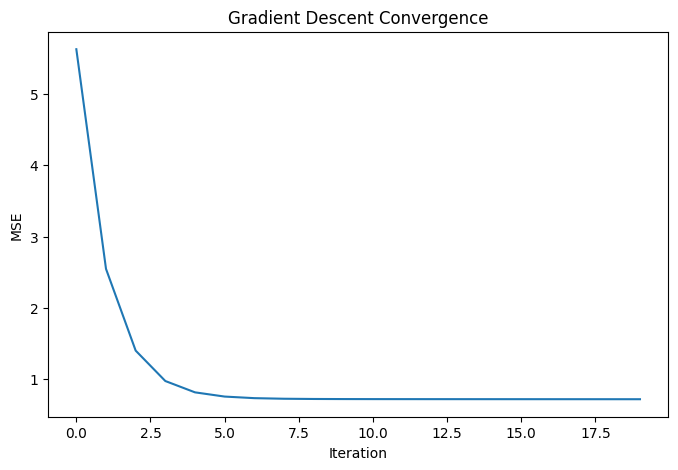

In [8]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def gradient_descent(X, y, lr=0.01, n_iters=1000):
    m = len(y)
    X_b = np.c_[np.ones((m,1)), X]
    theta = np.zeros(2)
    history = []
    for i in range(n_iters):
        preds = X_b.dot(theta)
        error = preds - y
        grad = (2/m) * X_b.T.dot(error)
        theta -= lr * grad
        history.append(mse(y, preds))
    return theta, history

theta_gd, history = gradient_descent(X_train, y_train, lr=0.01, n_iters=20)
print('Gradient descent theta:', theta_gd)
plt.plot(history)
plt.xlabel('Iteration'); plt.ylabel('MSE'); plt.title('Gradient Descent Convergence'); plt.show()

In [5]:
def regression_metrics(y_true, y_pred):
    mse_v = mean_squared_error(y_true, y_pred)
    rmse_v = np.sqrt(mse_v)
    mae_v = mean_absolute_error(y_true, y_pred)
    r2_v = r2_score(y_true, y_pred)
    return {'MSE':mse_v, 'RMSE':rmse_v, 'MAE':mae_v, 'R2':r2_v}

y_pred = lr.predict(X_test)
print(regression_metrics(y_test, y_pred))

{'MSE': np.float64(0.7091157771765549), 'RMSE': np.float64(0.8420901241414455), 'MAE': np.float64(0.629908653009376), 'R2': 0.45885918903846656}
